In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
programs_to_show = ['diffutils', 'sequential', 'mpi_priority']
new_program = 'mpi_priority'
assert new_program in programs_to_show
old_program = 'sequential'
assert old_program in programs_to_show

In [3]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-07-priority-post-merge.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
322,110,remove,5848,1.0,0.0,zipf,0,2,mpi_priority,8.0,558,0,87053,0
475,128,add,8362,0.2,0.0,zipf,0,3,mpi_priority,8.0,3826,0,20327,0
813,124,independent,6993,1.0,0.0,zipf,0,1,sequential,NaN,724,0,1022941,5533
471,56,addremove,3419,0.6,0.0,zipf,0,3,sequential,NaN,379,0,53270,1233
453,140,independent,8362,1.0,0.0,zipf,0,1,sequential,NaN,839,0,1491201,7353


In [4]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program repetition_i                  
143                 0       mpi_priority 0                 addremove   
                                         1                 addremove   
                                         2                 addremove   
                                         3                 addremove   
                            sequential   0                 addremove   
...                                                              ...   
31                  0       mpi_priority 3                 addremove   
                            sequential   0                 addremove   
                                         1                 addremove   
                                         2                 addremove   
                                         3                 addremove   

                                                       input_length_1  \
generation_config_i regen_i diff_program repetition_i                   
143                 0       mpi_priority 0                       8362   
                                         1                       8362   
                                         2                       8362   
                                         3                       8362   
                            sequential   0                       8362   
...                                                               ...   
31                  0       mpi_priority 3                       2391   
                            sequential   0                       2391   
                                         1                       2391   
                                         2                       2391   
                                         3                       2391   

                                                       input_change_strength  \
generation_config_i regen_i diff_program repetition_i                          
143                 0       mpi_priority 0                               1.0   
                                         1                               1.0   
                                         2                               1.0   
                                         3                               1.0   
                            sequential   0                               1.0   
...                                                                      ...   
31                  0       mpi_priority 3                               1.0   
                            sequential   0                               1.0   
                                         1                               1.0   
                                         2                               1.0   
                                         3                               1.0   

                                                       input_chunkiness  \
generation_config_i regen_i diff_program repetition_i                     
143                 0       mpi_priority 0                          0.0   
                                         1                          0.0   
                                         2                          0.0   
                                         3                          0.0   
                            sequential   0                          0.0   
...                                                                 ...   
31                  0       mpi_priority 3                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   
                                         2                          0.0   
                                         3                          0.0   

                                                      input_distribution  \
generation_config_i regen_i diff_program repetition_i                     

In [5]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

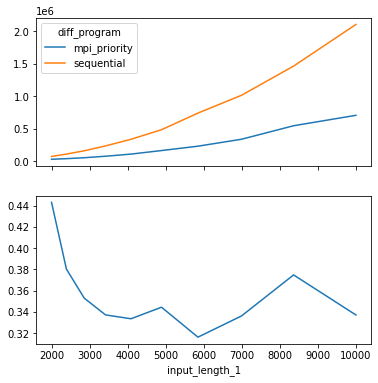

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[new_program] / temp[old_program]).plot(ax=ax[1]);

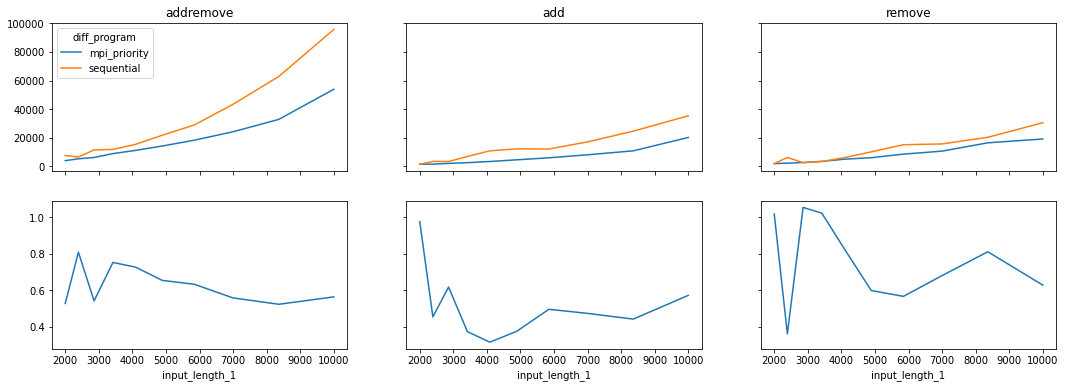

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp[new_program] / temp[old_program]).plot(ax=ax[1][input_strategy_i]);

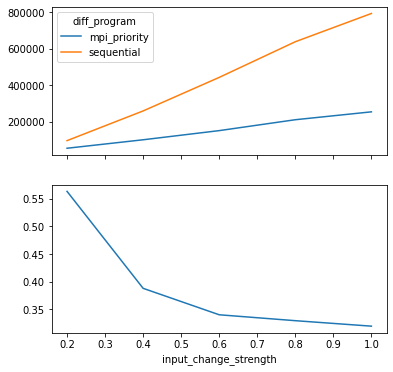

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[new_program] / temp[old_program]).plot(ax=ax[1]);

0.90625
0.8828125
0.06875


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
0,add,2000,0.2,0.0,zipf,8.0,387,0,10899,0
1,add,2000,0.2,0.0,zipf,8.0,387,0,10899,0
2,add,2000,0.2,0.0,zipf,8.0,387,0,10899,0
3,remove,2000,0.2,0.0,zipf,8.0,332,0,1989,0
4,add,2000,0.4,0.0,zipf,8.0,424,0,13233,0
5,remove,2000,0.6,0.0,zipf,8.0,255,0,7459,0
6,remove,2000,0.8,0.0,zipf,8.0,226,0,10413,0
7,addremove,2000,0.8,0.0,zipf,8.0,371,0,18049,0
8,add,2391,0.2,0.0,zipf,8.0,281,0,1576,0
9,addremove,2391,0.2,0.0,zipf,8.0,422,0,5306,0


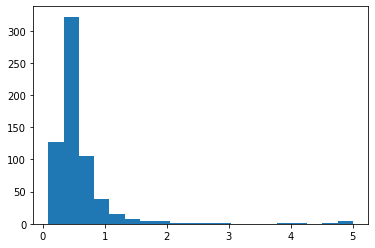

In [11]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp[new_program] < temp[old_program]).mean())
print((1.1 * temp[new_program] < temp[old_program]).mean())
print((temp[new_program] > 1.1 * temp[old_program]).mean())

hist_values = temp[new_program] / temp[old_program]
hist_values = hist_values.clip(upper=5)
plt.hist(hist_values, bins=20);

beaten_rows = []
for generation_config_i in temp[temp[new_program] > 1.1 * temp[old_program]].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)